In [22]:
from climada.util.api_client import Client
client = Client()

import pandas as pd
import geopandas as gpd
import json

In [53]:
# check what kind of data is available
import pandas as pd
data_types = client.list_data_type_infos()
dtf = pd.DataFrame(data_types)
dtf.head(15)

,data_type,data_type_group,status,description,properties,key_reference,version_notes
0,litpop,exposures,active,A global high-resolution asset exposure datase...,"[{'property': 'spatial_coverage', 'mandatory':...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....","[{'version': 'v2', 'notes': 'Countries with no..."
1,tropical_cyclone,hazard,active,Tropical cyclone wind footprints (m/s) at 150 ...,"[{'property': 'spatial_coverage', 'mandatory':...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....","[{'version': 'v2', 'notes': 'Higher resolution..."
2,wildfire,hazard,active,"Global wildfire dataset at 4km resolution, bas...","[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': 'https://gmd.coperni...",[]
3,river_flood,hazard,active,River flood [flood depth in meters and flooded...,"[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': 'https://www.nature....","[{'version': 'v2', 'notes': 'Higher resolution..."
4,crop_production,exposures,active,Historical and twenty-first century crop produ...,"[{'property': 'crop', 'mandatory': True, 'desc...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....",[]
5,storm_europe,hazard,active,European winter storm [gust in meters per seco...,[],"[{'ref_no': 1, 'ref_url': 'https://www.nat-haz...",[]
6,centroids,centroids,active,None,"[{'property': 'res_arcsec_land', 'mandatory': ...",[],[]
7,relative_cropyield,hazard,active,Historical and twenty-first century crop produ...,"[{'property': 'climate_scenario', 'mandatory':...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....",[]
8,earthquake,hazard,active,Earthquake hazard sets at 150 arcsec (ca. 4km)...,"[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': None, 'key_reference...",[]
9,flood,hazard,active,Flood footprint of historical events at a 200m...,"[{'property': 'date_creation', 'mandatory': Tr...",[],[]


In [39]:
# print hazard data availability
hazard_df = dtf[dtf['data_type_group']=='hazard']
hazard_df.to_csv('hazard.csv')
hazard_df

,data_type,data_type_group,status,description,properties,key_reference,version_notes
1,tropical_cyclone,hazard,active,Tropical cyclone wind footprints (m/s) at 150 ...,"[{'property': 'spatial_coverage', 'mandatory':...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....","[{'version': 'v2', 'notes': 'Higher resolution..."
2,wildfire,hazard,active,"Global wildfire dataset at 4km resolution, bas...","[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': 'https://gmd.coperni...",[]
3,river_flood,hazard,active,River flood [flood depth in meters and flooded...,"[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': 'https://www.nature....","[{'version': 'v2', 'notes': 'Higher resolution..."
5,storm_europe,hazard,active,European winter storm [gust in meters per seco...,[],"[{'ref_no': 1, 'ref_url': 'https://www.nat-haz...",[]
7,relative_cropyield,hazard,active,Historical and twenty-first century crop produ...,"[{'property': 'climate_scenario', 'mandatory':...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....",[]
8,earthquake,hazard,active,Earthquake hazard sets at 150 arcsec (ca. 4km)...,"[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': None, 'key_reference...",[]
9,flood,hazard,active,Flood footprint of historical events at a 200m...,"[{'property': 'date_creation', 'mandatory': Tr...",[],[]
12,hail,hazard,active,Radar-based daily hail hazard data at 1km spat...,"[{'property': 'variable', 'mandatory': True, '...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....",[]


In [45]:
# Set Country
country = 'Costa Rica'

# Load the GeoJSON file
geojson_file_path = 'C:\\Users\\olive\\Documents\\GitHub\\HotspotStoplight\\CropBoxes\\CR_Crop2.geojson'
with open(geojson_file_path, 'r') as file:
    geojson = json.load(file)
    
    # Function to calculate the bounding box from GeoJSON coordinates
def get_bounding_box(geojson):
    coordinates = geojson['features'][0]['geometry']['coordinates'][0]
    x_coords = [coord[0] for coord in coordinates]
    y_coords = [coord[1] for coord in coordinates]
    return [min(x_coords), max(x_coords), min(y_coords), max(y_coords)]

# Get bounding box
bounding_box = get_bounding_box(geojson)


<bound method Hazard.write_raster of <climada.hazard.base.Hazard object at 0x000002459DF06BB0>>

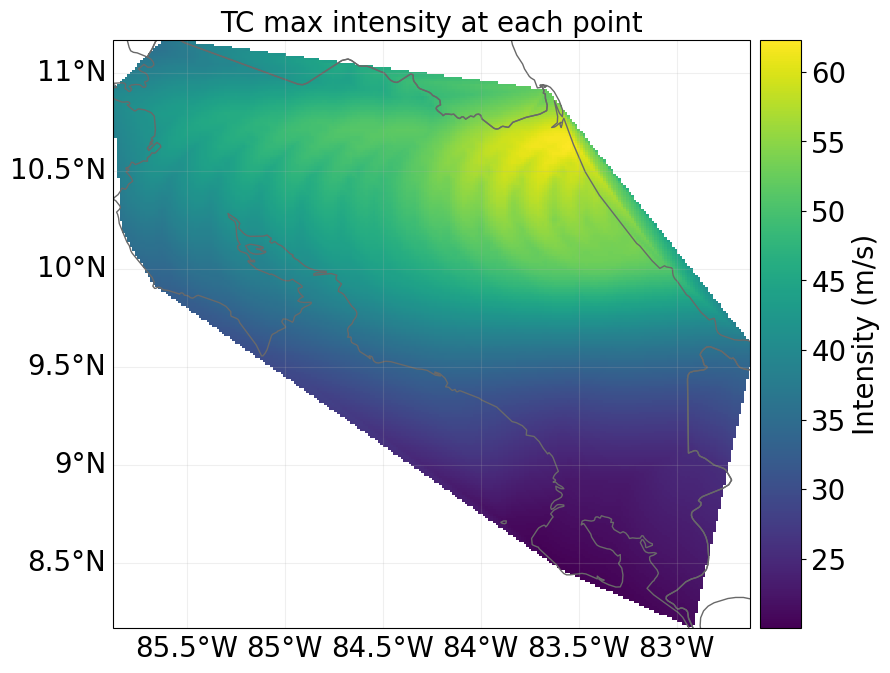

In [67]:
# Tropical Cyclone
tc = client.get_hazard('tropical_cyclone',properties={'country_name':country,'climate_scenario': 'rcp45', 'ref_year':'2040','nb_synth_tracks':'10'})
tc = tc.select(extent=bounding_box)
tc.plot_intensity(0)

<GeoAxes: title={'center': 'WFseason max intensity at each point'}>

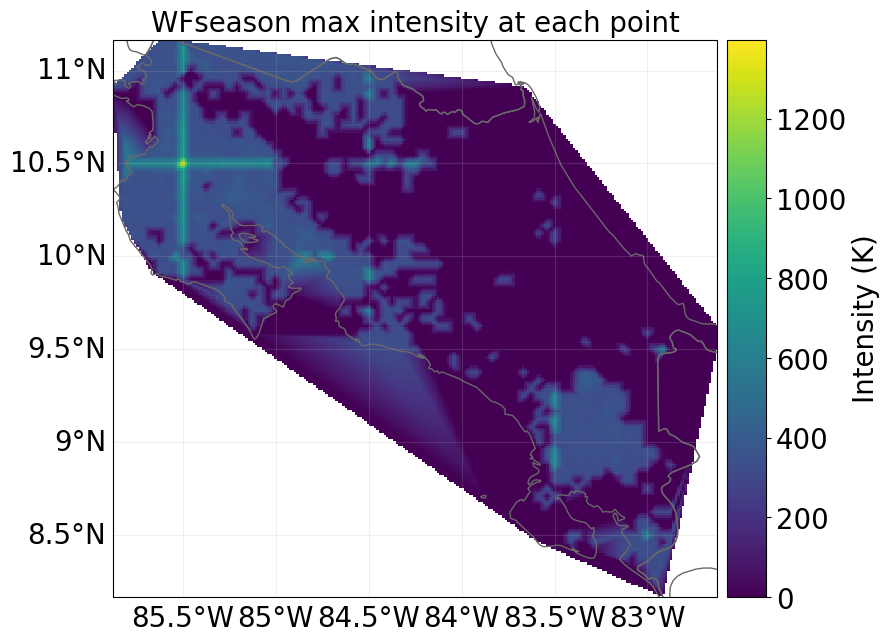

In [50]:
# Wildfire
wf = client.get_hazard('wildfire',properties={'country_name':country})
wf = wf.select(extent=bounding_box)
wf.plot_intensity(0)

<GeoAxes: title={'center': 'RF max intensity at each point'}>

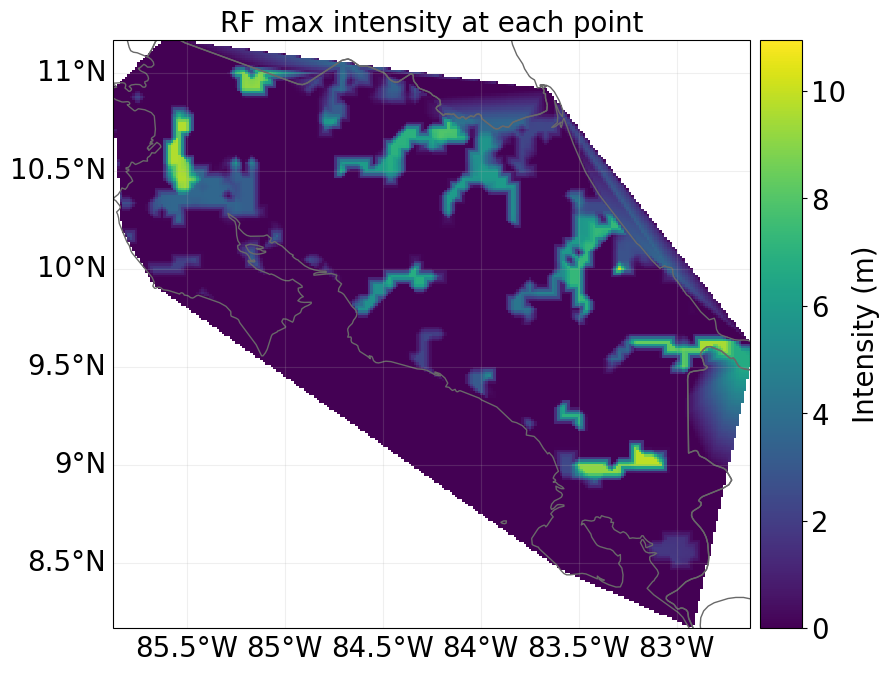

In [59]:
# River Flood
rf = client.get_hazard('river_flood',properties={'country_name':country,'climate_scenario': 'historical'})
rf = rf.select(extent=bounding_box)
rf.plot_intensity(0)

<GeoAxes: title={'center': 'FL max intensity at each point'}>

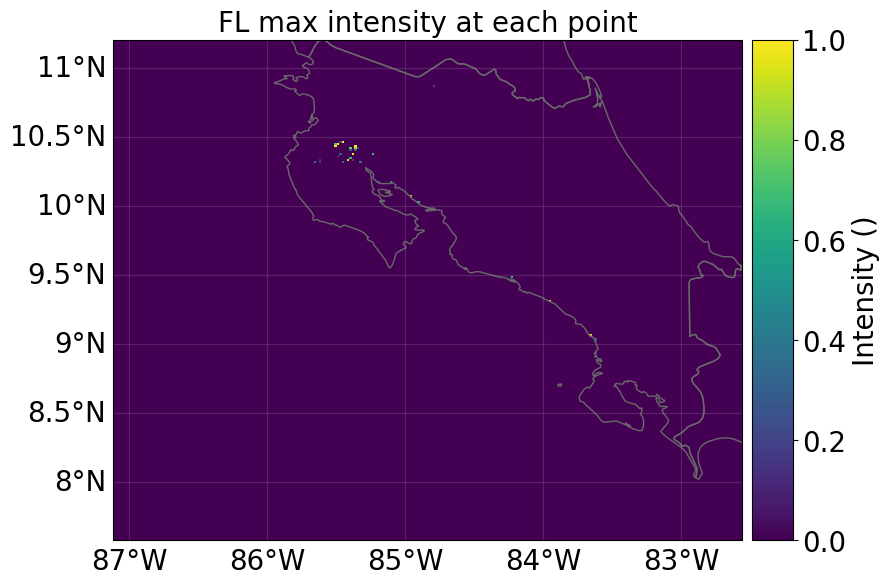

In [61]:
# relative cropyield, 'earthquake', 'flood'
fl = client.get_hazard('flood',properties={'country_name':country})
fl = fl.select(extent=bounding_box)
fl.plot_intensity(0)

<GeoAxes: title={'center': 'EQ max intensity at each point'}>

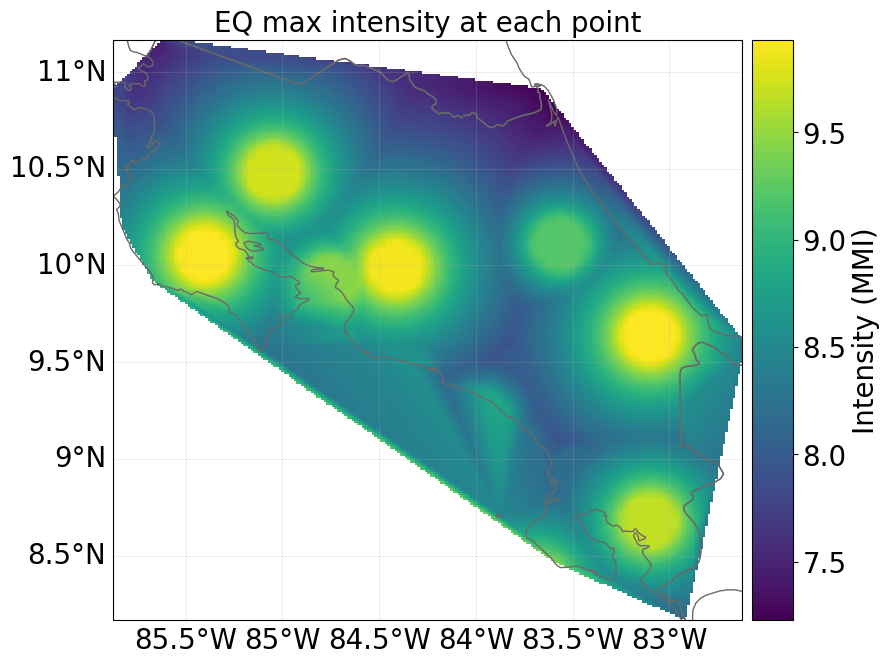

In [55]:
# Earthquake
eq = client.get_hazard('earthquake',properties={'country_name':country})
eq = eq.select(extent=bounding_box)
eq.plot_intensity(0)

In the above exploration process, we focus on the area constrained by given coordinates. 

There are in total 9 hazard types provided by CLIMADA Data API, and for this specific area, only some of them are available(river flood, earthquake, wildfire and tropical cyclone).